In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\ds_salaries.csv')
df

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:', df[df.duplicated()].shape[0])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ: 0


In [6]:
df.drop(columns=['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True) # –£–¥–∞–ª—è–µ–º –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
df.head()

work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary_in_usd employee_residence  remote_ratio company_location  \
0          79833                 DE             0               DE   
1         260000                 JP             0               JP   
2         109024                 GB            50               GB   
3          20000                 HN             0               HN   
4         150000                 US            50               US   

  company_size  
0            L  
1            S  
2            M  
3            S  
4            L

In [7]:
# –ü—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —Å–∫—Ä—ã—Ç—ã—Ö –ø—Ä–æ–ø—É—Å–∫–æ–≤
for i in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']:
    print(f'–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ {i}: {df[i].unique()}')
    print()


–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ experience_level: ['MI' 'SE' 'EN' 'EX']

–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ employment_type: ['FT' 'CT' 'PT' 'FL']

–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ job_title: ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software En

In [8]:
display(df['employee_residence'].value_counts().head(10))
print()
display(df['job_title'].value_counts().head(10))
print()
display(df['company_location'].value_counts().head(10))

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: count, dtype: int64

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: count, dtype: int64

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: count, dtype: int64

–í —Å—Ç–æ–ª–±—Ü–µ employee_residence –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –±–æ–ª–µ–µ 30 —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å—Ç—Ä–∞–Ω. –¢–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤ —Å–≤–æ—ë–º –∞–Ω–∞–ª–∏–∑–µ, —Ç–æ –æ–±—ä–µ–¥–∏–Ω–∏–º –≤—Å–µ —Å—Ç—Ä–∞–Ω—ã, —É –∫–æ—Ç–æ—Ä—ã—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π 5 –∏ –º–µ–Ω–µ–µ –≤ 1 –±–ª–æ–∫ - other.

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–∞—è —Å–∏—Ç—É–∞—Ü–∏—è —Å–æ —Å—Ç–æ–ª–±—Ü–æ–º job_title, –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—ã–µ 4 –≥—Ä—É–ø–ø—ã, –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω–æ–µ –æ–±—ä–µ–¥–∏–Ω–∏–º –≤ 1 –±–ª–æ–∫ - other

–¢–∞–∫–∂–µ –ø–æ—Å—Ç—É–ø–∏–º –∏ —Å–æ —Å—Ç–æ–ª–±—Ü–æ–º company_location, –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—ã–µ 8 –≥—Ä—É–ø–ø, –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –æ–±—ä–µ–¥–∏–Ω–∏–º –≤ 1 –±–ª–æ–∫ - other

In [9]:
df['employee_residence'] = df['employee_residence'].apply(lambda i: i if i in ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR', 'JP', 'PT', 'BR', 'PK'] else 'other')
df['job_title'] = df['job_title'].apply(lambda i: i if i in ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer '] else 'other')
df['company_location'] = df['company_location'].apply(lambda i: i if i in ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR'] else 'other')


In [10]:
display(df['employee_residence'].value_counts())
print()
display(df['job_title'].value_counts())
print()
display(df['company_location'].value_counts())

employee_residence
US       332
other     76
GB        44
IN        30
CA        29
DE        25
FR        18
ES        15
GR        13
JP         7
PK         6
PT         6
BR         6
Name: count, dtype: int64

job_title
other             235
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: count, dtype: int64

company_location
US       355
other     83
GB        47
CA        30
DE        28
IN        24
FR        15
ES        14
GR        11
Name: count, dtype: int64

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ - –≤—Å–µ, –∫—Ä–æ–º–µ salary_in_usd

In [11]:
df.describe(include='all')

work_year experience_level employment_type job_title  salary_in_usd  \
count    607.000000              607             607       607     607.000000   
unique          NaN                4               4         4            NaN   
top             NaN               SE              FT     other            NaN   
freq            NaN              280             588       235            NaN   
mean    2021.405272              NaN             NaN       NaN  112297.869852   
std        0.692133              NaN             NaN       NaN   70957.259411   
min     2020.000000              NaN             NaN       NaN    2859.000000   
25%     2021.000000              NaN             NaN       NaN   62726.000000   
50%     2022.000000              NaN             NaN       NaN  101570.000000   
75%     2022.000000              NaN             NaN       NaN  150000.000000   
max     2022.000000              NaN             NaN       NaN  600000.000000   

       employee_residence  remote_ratio company_location company_size  
count                 607     607.00000              607          607  
unique                 13           NaN                9            3  
top                    US           NaN               US            M  
freq                  332           NaN              355          326  
mean                  NaN      70.92257              NaN          NaN  
std                   NaN      40.70913              NaN          NaN  
min                   NaN       0.00000              NaN          NaN  
25%                   NaN      50.00000              NaN          NaN  
50%                   NaN     100.00000              NaN          NaN  
75%                   NaN     100.00000              NaN          NaN  
max                   NaN     100.00000              NaN          NaN

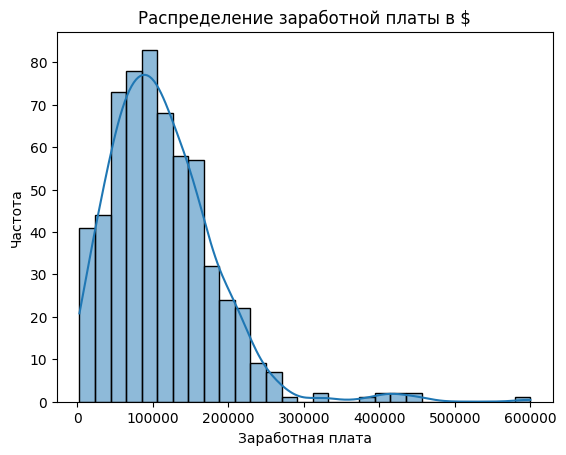

In [12]:
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã –≤ $')
plt.xlabel('–ó–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
sns.histplot(df['salary_in_usd'], kde=True);


In [13]:
# –ê–¥–∞–ø—Ç–∏—Ä—É–µ–º —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã 
df['experience_level'] = df['experience_level'].replace({
    'EN': 'Entry-level',
    'MI': 'Mid-level', 
    'SE': 'Senior-level',
    'EX': 'Executive'
})

df['employment_type'] = df['employment_type'].replace({
    'PT': 'Part-time',
    'FT': 'Full-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

df['remote_ratio'] = df['remote_ratio'].replace({
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
})

# –†–∞—Å—à–∏—Ñ—Ä–æ–≤—ã–≤–∞–µ–º —Å—Ç—Ä–∞–Ω—ã
country_codes = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'DE': 'Germany',
    'FR': 'France',
    'IN': 'India',
    'CA': 'Canada',
    'ES': 'Spain',
    'GR': 'Greece',
    'JP': 'Japan',
    'PT': 'Portugal',
    'BR': 'Brazil',
    'PK': 'Pakistan',
    'other': 'Other Countries'
}

df['employee_residence'] = df['employee_residence'].replace(country_codes)
df['company_location'] = df['company_location'].replace(country_codes)

**–ü–µ—Ä–≤—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–¥–µ–ª–∞—Ç—å —Ä—è–¥ –≤—ã–≤–æ–¥–æ–≤:**
1) –ü—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç
2) –î—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç
3) –¢–∞–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã –∫–∞–∫ Unnamed: 0, salary(–æ–±—â–∞—è –≤—ã–ø–ª–∞—á–µ–Ω–Ω–∞—è –≤–∞–ª–æ–≤–∞—è —Å—É–º–º–∞ –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã) –∏ salary_currency(–≤–∞–ª—é—Ç–∞ –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã) —è–≤–ª—è—é—Ç—Å—è –Ω–µ–∏—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏, —Ç–∞–∫ –∫–∞–∫ –≤—Å—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–æ –∑–∞—Ä–ø–ª–∞—Ç—É –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ –≤ —Å—Ç–æ–ª–±—Ü–µ salary_in_usd (–∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö –°–®–ê)
4) –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∏–∑ —Å—Ç–æ–ª–±—Ü–æ–≤ —Ö–æ—Ç—å –∏ –Ω–µ –ø–æ–º–æ–≥—É—Ç –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –æ—Å–Ω–æ–≤–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã –ø—Ä–æ–µ–∫—Ç–∞, –æ–¥–Ω–∞–∫–æ –º–æ–≥—É—Ç –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è –¥–ª—è –ø–æ–∏—Å–∫–∞ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–µ–π, –æ—Å—Ç–∞–≤–ª—è–µ–º –∏—Ö.
5) –í —Å—Ç–æ–ª–±—Ü–µ employee_residence, job_title, company_location —É–º–µ–Ω—å—à–∏–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≥—Ä—É–ø–ø
6) –ê–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–ª–∏ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã
7) –°—Ç–æ–ª–±–µ—Ü salary_in_usd –Ω–µ –≤—ã–≥–ª—è–¥–∏—Ç –∫–∞–∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–º —ç—Ç–æ –¥–∞–ª–µ–µ
8) –Ø –Ω–µ —Å—Ç–∞–ª –∏–∑–º–µ–Ω—è—Ç—å —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ –≤ –¥–∞–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –æ—á–µ–Ω—å –º–∞–ª–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π. –û–¥–Ω–∞–∫–æ –ø—Ä–∏ –∂–µ–ª–∞–Ω–∏–∏ –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ—ã –Ω–∞ category. –¢–∞–∫–∂–µ –º–æ–∂–Ω–æ –ø–æ–º–µ–Ω—è—Ç—å —Ç–∏–ø int64 –Ω–∞ int32 —É —Å—Ç–æ–ª–±—Ü–∞ salary_in_usd.

# 2. –í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    object
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(2), object(7)
memory usage: 42.8+ KB


**–ë–∞–∑–æ–≤—ã–π –≤–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞**

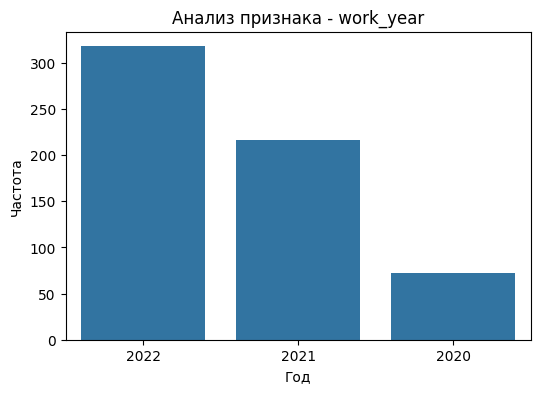

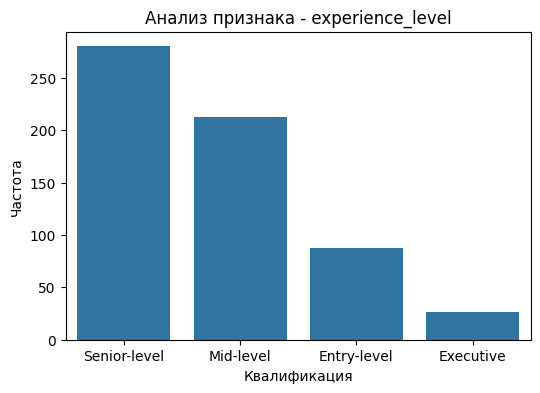

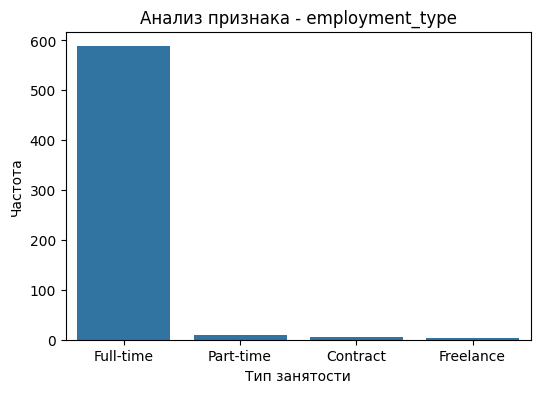

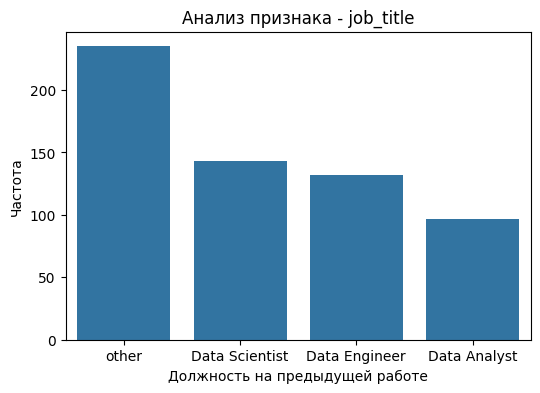

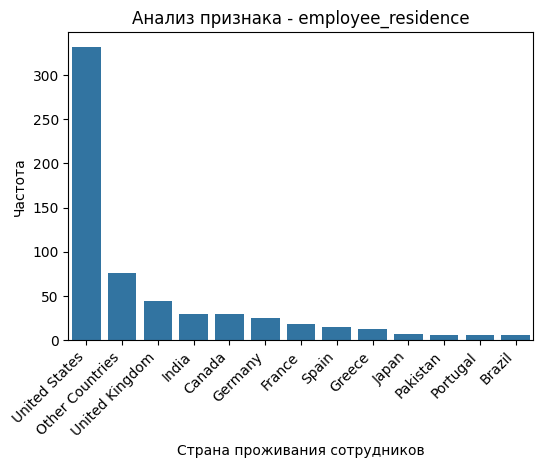

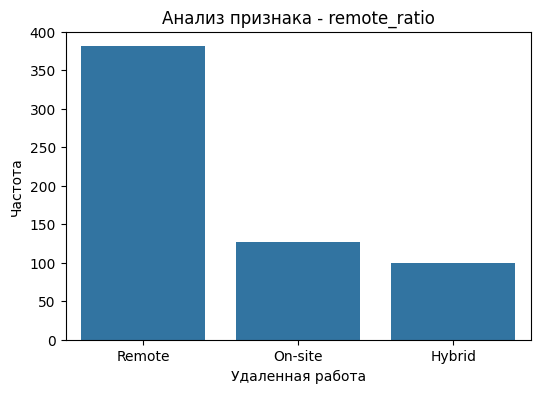

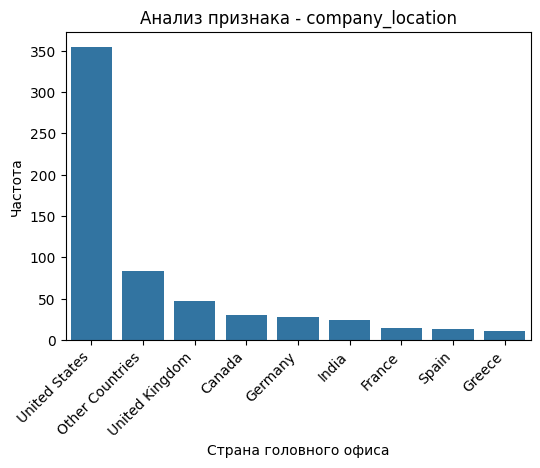

In [15]:
list_name_of_columns = ['work_year','experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio','company_location', 'company_size']
list_name_of_x_labels = ['–ì–æ–¥', '–ö–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è', '–¢–∏–ø –∑–∞–Ω—è—Ç–æ—Å—Ç–∏', '–î–æ–ª–∂–Ω–æ—Å—Ç—å –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–π —Ä–∞–±–æ—Ç–µ', '–°—Ç—Ä–∞–Ω–∞ –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤', '–£–¥–∞–ª–µ–Ω–Ω–∞—è —Ä–∞–±–æ—Ç–∞', '–°—Ç—Ä–∞–Ω–∞ –≥–æ–ª–æ–≤–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞', '–†–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏']
for i in range(0, 7):
    if list_name_of_columns[i] in ['employee_residence', 'company_location']:
        plt.figure(figsize=(6, 4))
        plt.title(f'–ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ - {list_name_of_columns[i]}')
        plt.xlabel(f'{list_name_of_x_labels[i]}')
        plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
        plt.xticks(rotation=45, ha='right')
        sns.countplot(df, x=list_name_of_columns[i], order=df[list_name_of_columns[i]].value_counts().index);
    else:
        plt.figure(figsize=(6, 4))
        plt.title(f'–ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ - {list_name_of_columns[i]}')
        plt.xlabel(f'{list_name_of_x_labels[i]}')
        plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
        sns.countplot(df, x=list_name_of_columns[i], order=df[list_name_of_columns[i]].value_counts().index);
    

<Axes: xlabel='–ó–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞'>

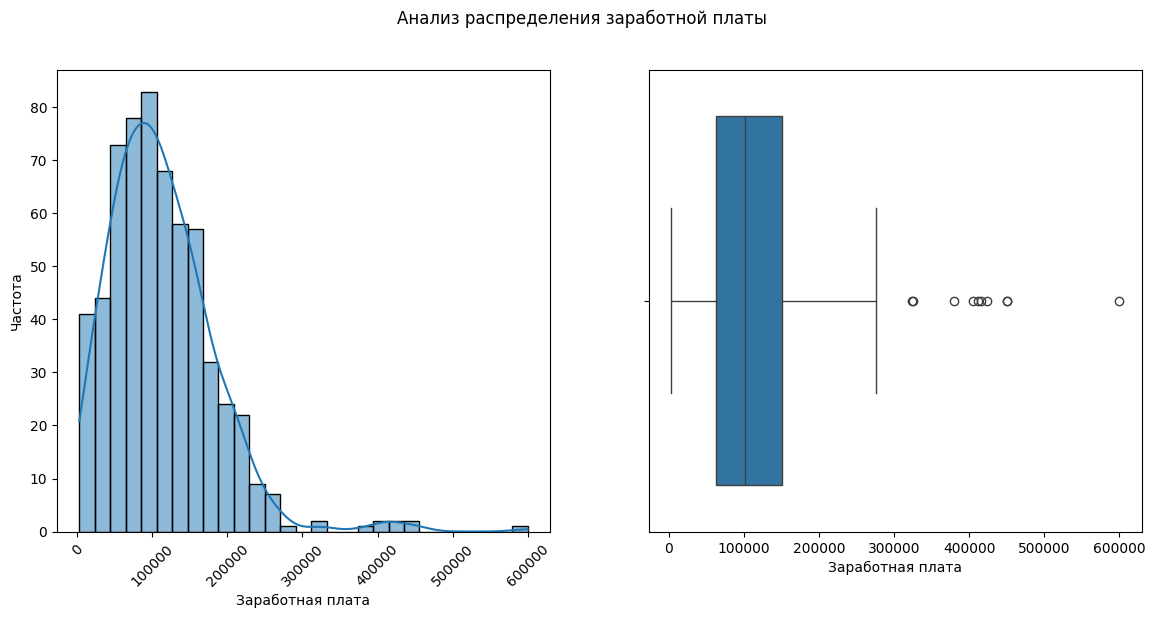

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('–ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã')
axes[0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
axes[0].set_xlabel('–ó–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞')
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(df['salary_in_usd'], kde=True, ax=axes[0])

axes[1].set_xlabel('–ó–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞')
sns.boxplot(df['salary_in_usd'], ax=axes[1], orient='h')

**–û—Ç–ª–∏—á–∞—é—Ç—Å—è –ª–∏ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–∞—Ä–∞–±–æ—Ç–Ω—ã–µ –ø–ª–∞—Ç—ã –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≥–æ–¥–∞?**

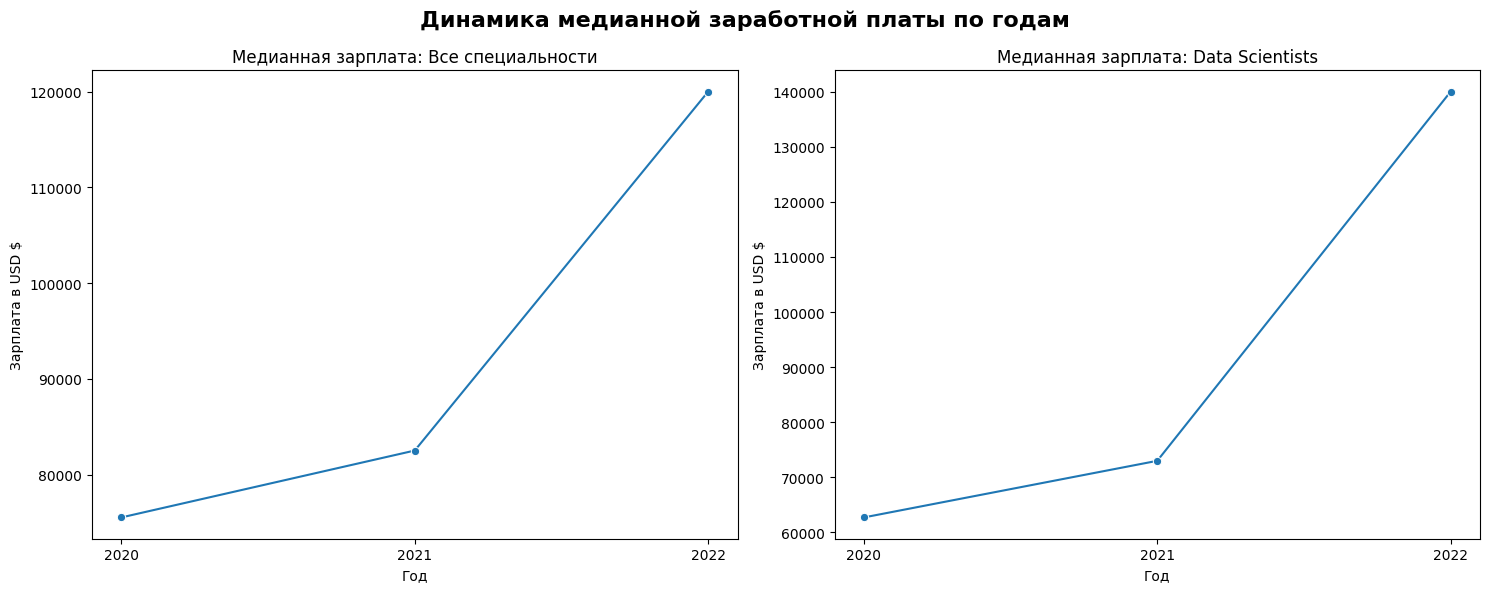

In [17]:
# –ì–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
years_data = df.groupby('work_year', observed=False)['salary_in_usd'].median()
filt_data_science = df[df['job_title'] == 'Data Scientist']
years_data_science = filt_data_science.groupby('work_year', observed=False)['salary_in_usd'].median()

# –ü–µ—Ä–≤—ã–π –≥—Ä–∞—Ñ–∏–∫
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(y=years_data.values, x=years_data.index, ax=axes[0], marker='o')
axes[0].set_xticks([2020, 2021, 2022])
axes[0].set_title('–ú–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞: –í—Å–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏')
axes[0].set_xlabel('–ì–æ–¥')
axes[0].set_ylabel('–ó–∞—Ä–ø–ª–∞—Ç–∞ –≤ USD $')


# –í—Ç–æ—Ä–æ–π –≥—Ä–∞—Ñ–∏–∫
sns.lineplot(y=years_data_science.values, x=years_data_science.index, ax=axes[1], marker='o')
axes[1].set_xticks([2020, 2021, 2022])
axes[1].set_title('–ú–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞: Data Scientists')
axes[1].set_xlabel('–ì–æ–¥')
axes[1].set_ylabel('–ó–∞—Ä–ø–ª–∞—Ç–∞ –≤ USD $')


fig.suptitle('–î–∏–Ω–∞–º–∏–∫–∞ –º–µ–¥–∏–∞–Ω–Ω–æ–π –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã –ø–æ –≥–æ–¥–∞–º', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



**–ö–∞–∫ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è –∑–∞—Ä–ø–ª–∞—Ç—ã Data Scientist –∏ Data Engineer –≤ 2022 –≥–æ–¥—É?**

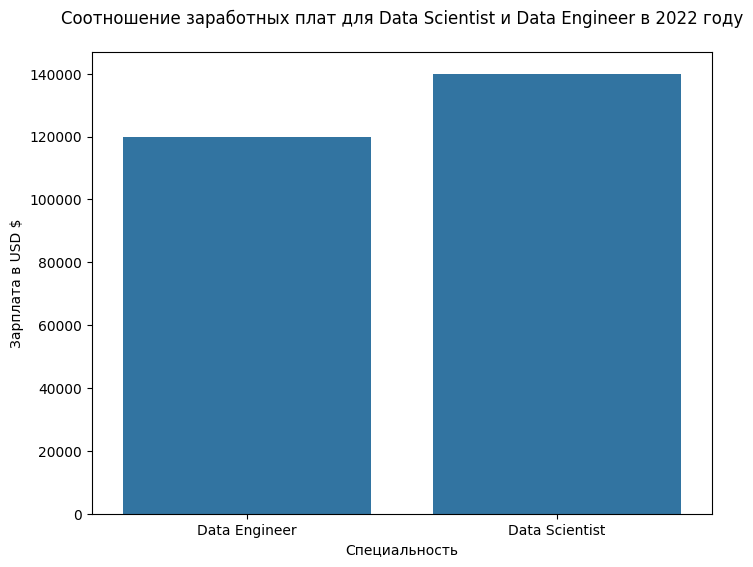

In [18]:
data_science_engineer = df[
    (df['job_title'].isin(['Data Scientist', 'Data Engineer'])) & 
    (df['work_year'] == 2022)
]

data_science_engineer_group = data_science_engineer.groupby('job_title', observed=True)['salary_in_usd'].median()
plt.figure(figsize=(8, 6))
sns.barplot(x=data_science_engineer_group.index, y=data_science_engineer_group.values)
plt.title('–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∑–∞—Ä–∞–±–æ—Ç–Ω—ã—Ö –ø–ª–∞—Ç –¥–ª—è Data Scientist –∏ Data Engineer –≤ 2022 –≥–æ–¥—É', pad=20)
plt.xlabel('–°–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å')
plt.ylabel('–ó–∞—Ä–ø–ª–∞—Ç–∞ –≤ USD $');

**–ö–∞–∫ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è –∑–∞—Ä–ø–ª–∞—Ç—ã —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Scientist –≤ –∫–æ–º–ø–∞–Ω–∏—è—Ö —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤?**

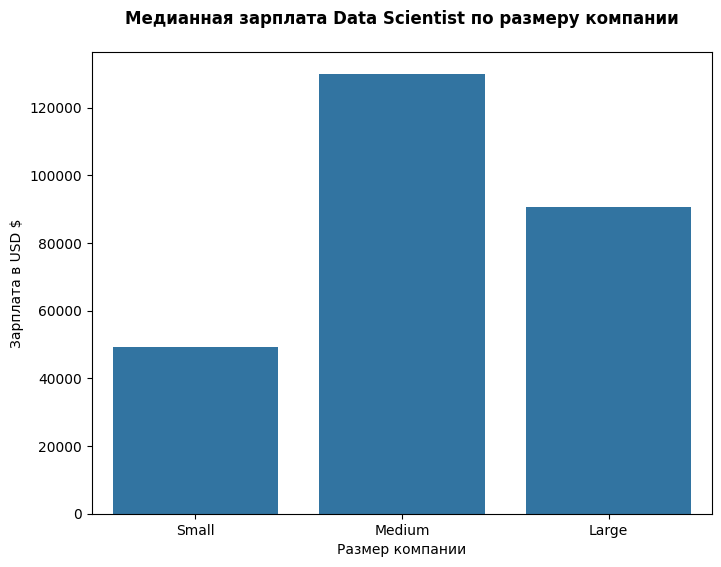

In [19]:
order_list = ['Small', 'Medium', 'Large']
data_science_company = df[df['job_title'] == 'Data Scientist']
data_science_company_group = data_science_company.groupby('company_size')['salary_in_usd'].median()

plt.figure(figsize=(8, 6))
sns.barplot(x=data_science_company_group.index, 
            y=data_science_company_group.values, 
            order=order_list
)

plt.title('–ú–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞ Data Scientist –ø–æ —Ä–∞–∑–º–µ—Ä—É –∫–æ–º–ø–∞–Ω–∏–∏', fontweight='bold', pad=20)
plt.xlabel('–†–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏')
plt.ylabel('–ó–∞—Ä–ø–ª–∞—Ç–∞ –≤ USD $');

**–ï—Å—Ç—å –ª–∏ –≤–ª–∏—è–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ —Ç–∏–ø–∞ —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –Ω–∞ –∑–∞—Ä–∞–±–æ—Ç–Ω—É—é –ø–ª–∞—Ç—É?**

In [20]:
data_experience_level_employment_level = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].median().reset_index()
data_experience_level_employment_level

experience_level employment_type  salary_in_usd
0       Entry-level        Contract        65937.5
1       Entry-level       Full-time        59102.0
2       Entry-level       Part-time        15966.0
3         Executive        Contract       416000.0
4         Executive       Full-time       167875.0
5         Mid-level        Contract       270000.0
6         Mid-level       Freelance        20000.0
7         Mid-level       Full-time        77161.0
8         Mid-level       Part-time        54957.0
9      Senior-level        Contract       105000.0
10     Senior-level       Freelance        60000.0
11     Senior-level       Full-time       136300.0

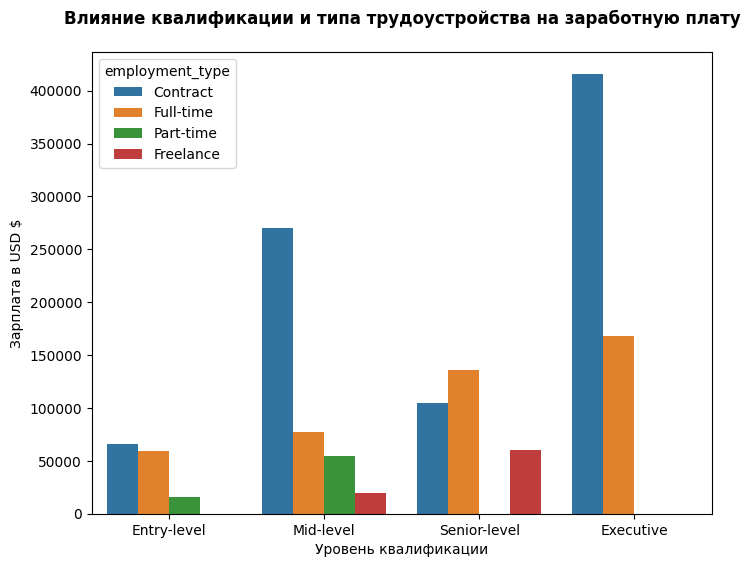

In [21]:
order_list = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive']
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
            data=data_experience_level_employment_level, 
            x='experience_level', 
            y='salary_in_usd', 
            hue='employment_type',
            order=order_list)
barplot.set_title('–í–ª–∏—è–Ω–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ —Ç–∏–ø–∞ —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –Ω–∞ –∑–∞—Ä–∞–±–æ—Ç–Ω—É—é –ø–ª–∞—Ç—É', pad=20, fontweight='bold')
barplot.set_ylabel('–ó–∞—Ä–ø–ª–∞—Ç–∞ –≤ USD $')
barplot.set_xlabel('–£—Ä–æ–≤–µ–Ω—å –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏');

–ü—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∞–Ω–æ–º–∞–ª—å–Ω–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ Mid-level/Contract –∏ Executive/Contract

In [22]:
data_mid_level_contract = df[(df['experience_level'] == 'Mid-level') & (df['employment_type'] == 'Contract')]
data_mid_level_contract


work_year experience_level employment_type job_title  salary_in_usd  \
78       2021        Mid-level        Contract     other         270000   

   employee_residence remote_ratio company_location company_size  
78      United States       Remote    United States        Large

In [23]:
data_executive_level_contract = df[(df['experience_level'] == 'Executive') & (df['employment_type'] == 'Contract')]
data_executive_level_contract

work_year experience_level employment_type job_title  salary_in_usd  \
225       2021        Executive        Contract     other         416000   

    employee_residence remote_ratio company_location company_size  
225      United States       Remote    United States        Small

**–í–µ—Ä–Ω–æ –ª–∏, —á—Ç–æ –≤ –æ–¥–Ω–∏—Ö —Å—Ç—Ä–∞–Ω–∞—Ö –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –≤—ã—à–µ, —á–µ–º –≤ –¥—Ä—É–≥–∏—Ö?**

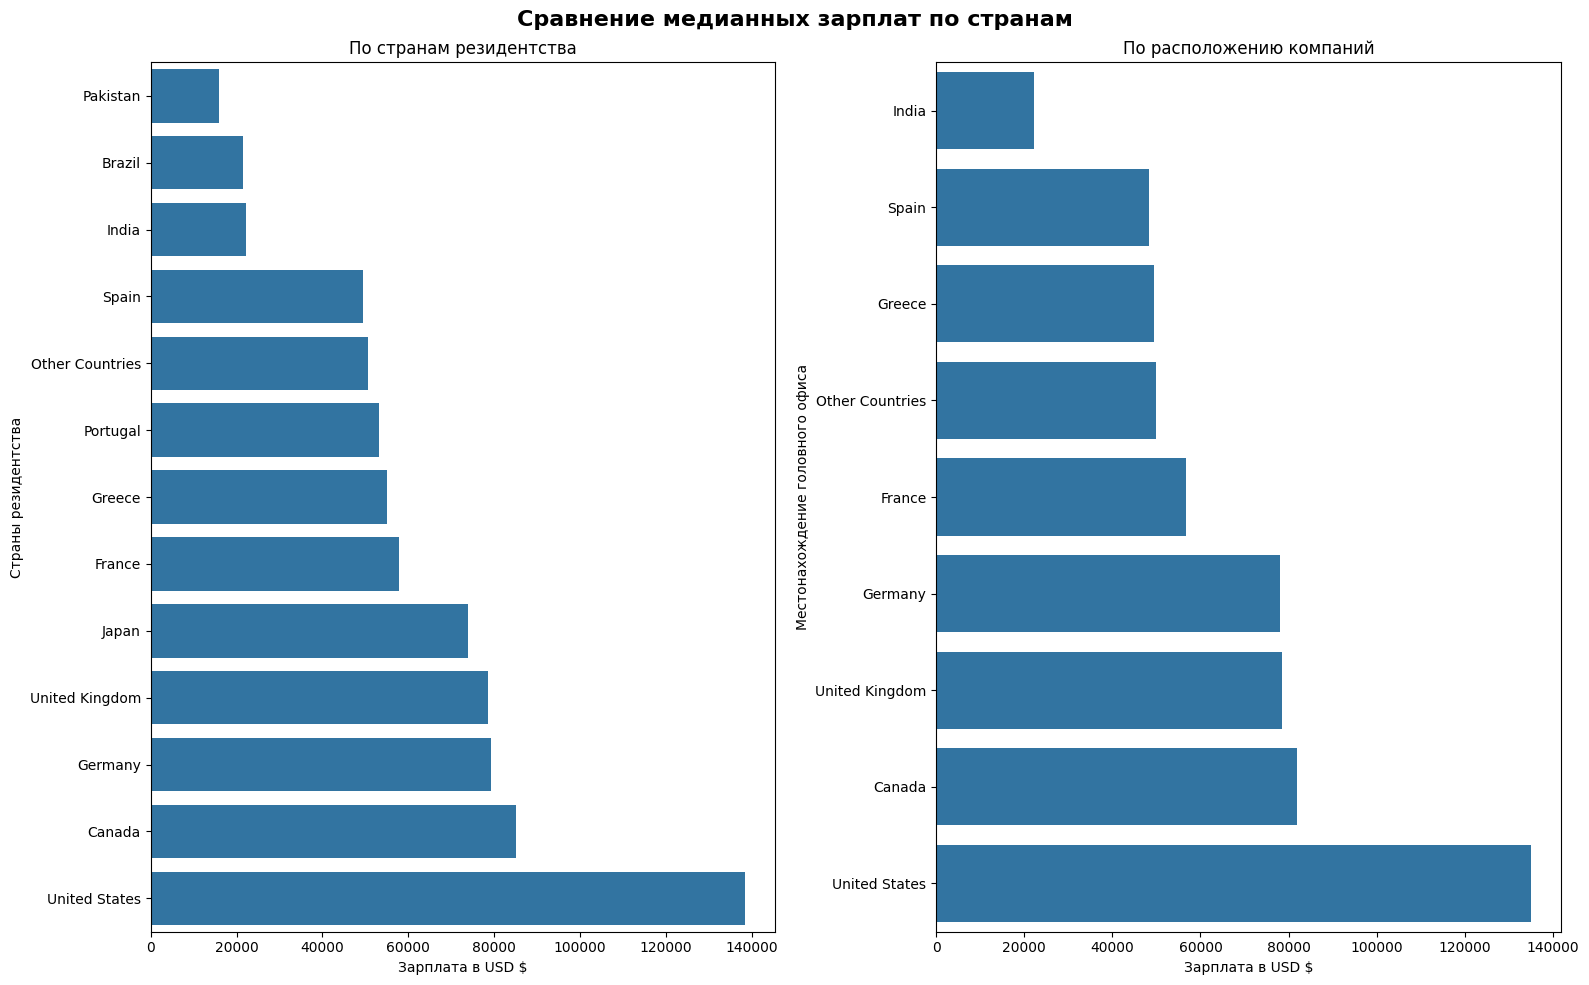

In [24]:
country_employee_data = df.groupby('employee_residence')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
country_company_location_data = df.groupby('company_location')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

barplot_1 = sns.barplot(
    data=country_employee_data, 
    y='employee_residence', 
    x='salary_in_usd',      
    ax=axes[0])

barplot_1.set_xlabel('–ó–∞—Ä–ø–ª–∞—Ç–∞ –≤ USD $')
barplot_1.set_ylabel('–°—Ç—Ä–∞–Ω—ã —Ä–µ–∑–∏–¥–µ–Ω—Ç—Å—Ç–≤–∞')
barplot_1.set_title('–ü–æ —Å—Ç—Ä–∞–Ω–∞–º —Ä–µ–∑–∏–¥–µ–Ω—Ç—Å—Ç–≤–∞')

barplot_2 = sns.barplot(
    data=country_company_location_data, 
    y='company_location',  
    x='salary_in_usd', 
    ax=axes[1])

barplot_2.set_xlabel('–ó–∞—Ä–ø–ª–∞—Ç–∞ –≤ USD $')
barplot_2.set_ylabel('–ú–µ—Å—Ç–æ–Ω–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –≥–æ–ª–æ–≤–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞')
barplot_2.set_title('–ü–æ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—é –∫–æ–º–ø–∞–Ω–∏–π')

fig.suptitle('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç –ø–æ —Å—Ç—Ä–∞–Ω–∞–º', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [25]:
remote_ratio_data = df.groupby('remote_ratio')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
remote_ratio_data

remote_ratio  salary_in_usd
0       Hybrid        69999.0
1      On-site        99000.0
2       Remote       115000.0

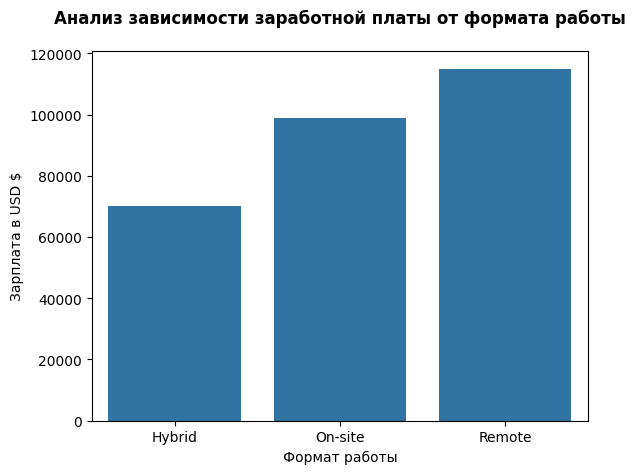

In [26]:
plt.title('–ê–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã –æ—Ç —Ñ–æ—Ä–º–∞—Ç–∞ —Ä–∞–±–æ—Ç—ã', pad=20,  fontsize=12, fontweight='bold')
sns.barplot(
        data=remote_ratio_data,
        x='remote_ratio',
        y='salary_in_usd')
plt.xlabel('–§–æ—Ä–º–∞—Ç —Ä–∞–±–æ—Ç—ã')
plt.ylabel('–ó–∞—Ä–ø–ª–∞—Ç–∞ –≤ USD $');

**–í—ã–≤–æ–¥—ã:**
1) –î–∏–Ω–∞–º–∏–∫–∞ –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞ –∫–∞–∫ –¥–ª—è —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Scientist, —Ç–∞–∫ –∏ –¥–ª—è –≤—Å–µ—Ö —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–µ–π –≤ —Ü–µ–ª–æ–º.

2) –ú–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Scientist –Ω–∞ 20 —Ç—ã—Å—è—á –¥–æ–ª–ª–∞—Ä–æ–≤ –Ω–∏–∂–µ, —á–µ–º —É Data Engineer.

3) –ù–∞–∏–±–æ–ª—å—à–∏–π —É—Ä–æ–≤–µ–Ω—å –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –≤ —Å—Ä–µ–¥–Ω–∏—Ö –∫–æ–º–ø–∞–Ω–∏—è—Ö, –∞ –Ω–µ –≤ –∫—Ä—É–ø–Ω—ã—Ö. –î–∞–Ω–Ω—É—é –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å –º–æ–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å —Ç–µ–º, —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–∏—Ö –∫–æ–º–ø–∞–Ω–∏—è—Ö —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã —á–∞—Å—Ç–æ –≤—ã–ø–æ–ª–Ω—è—é—Ç –ø–æ–ª–Ω—ã–π —Ü–∏–∫–ª —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏: –æ—Ç —Å–±–æ—Ä–∞ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –¥–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∏ –≤–Ω–µ–¥—Ä–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è. –í –∫—Ä—É–ø–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏—è—Ö –æ–±—ã—á–Ω–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —á—ë—Ç–∫–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –æ–±—è–∑–∞–Ω–Ω–æ—Å—Ç–µ–π –º–µ–∂–¥—É Data Engineer, Data Analyst –∏ Data Scientist, —á—Ç–æ –º–æ–∂–µ—Ç –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞—Ç—å –≤–ª–∏—è–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞ –Ω–∞ –±–∏–∑–Ω–µ—Å-—Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, —É—Ä–æ–≤–µ–Ω—å –∏—Ö –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏—è.

4) –ù–∞ —Å—Ç–æ–ª–±—á–∞—Ç–æ–π –¥–∏–∞–≥—Ä–∞–º–º–µ, –æ—Ç—Ä–∞–∂–∞—é—â–µ–π –≤–ª–∏—è–Ω–∏–µ —É—Ä–æ–≤–Ω—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ —Ç–∏–ø–∞ —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –Ω–∞ –∑–∞—Ä–∞–±–æ—Ç–Ω—É—é –ø–ª–∞—Ç—É, –±—ã–ª–∞ –≤—ã—è–≤–ª–µ–Ω–∞ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è –∞–Ω–æ–º–∞–ª–∏—è. –°—Ç–æ–ª–±–µ—Ü Mid-level/Contract –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–∞–∂–µ Senior-—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤, –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—è –∞–Ω–æ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–∞—è —Å–∏—Ç—É–∞—Ü–∏—è –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ Executive/Contract, –∫–æ—Ç–æ—Ä–∞—è —Ç–∞–∫–∂–µ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –≤—ã—à–µ –¥—Ä—É–≥–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

    –î–µ—Ç–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –æ–±–µ —ç—Ç–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ñ–æ—Ä–º–∏—Ä—É—é—Ç—Å—è –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–º –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ–º –≤ –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø–µ, —á—Ç–æ –Ω–µ –æ—Ç—Ä–∞–∂–∞–µ—Ç —Ä–µ–∞–ª—å–Ω–æ–π —Ä—ã–Ω–æ—á–Ω–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏ –∏ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –Ω–µ–∑–Ω–∞—á–∏–º—ã–º. –¢–∞–∫–∏–µ –≤—ã–±—Ä–æ—Å—ã –º–æ–≥—É—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω—ã —Å —É–Ω–∏–∫–∞–ª—å–Ω—ã–º–∏ –æ–±—Å—Ç–æ—è—Ç–µ–ª—å—Å—Ç–≤–∞–º–∏ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞ (–æ—Å–æ–±—ã–µ —É—Å–ª–æ–≤–∏—è –∫–æ–Ω—Ç—Ä–∞–∫—Ç–∞, –Ω–∏—à–µ–≤–∞—è —ç–∫—Å–ø–µ—Ä—Ç–∏–∑–∞ –∏–ª–∏ –æ—à–∏–±–∫–∞ –≤ –¥–∞–Ω–Ω—ã—Ö). –î–∞–Ω–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –º–æ–∂–Ω–æ –ª–∏–±–æ —É–¥–∞–ª–∏—Ç—å, –ª–∏–±–æ –∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞—Ç—å, –µ—Å–ª–∏ –æ–Ω–∏ –Ω–µ –±—É–¥—É—Ç –º–µ—à–∞—Ç—å –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –∞–Ω–∞–ª–∏–∑–µ.

5) –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –º–µ—Å—Ç–æ–Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –ø—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç–∞ –∏–ª–∏ –≥–æ–ª–æ–≤–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞ –Ω–µ –¥–∞–ª–æ –Ω–∏–∫–∞–∫–∏—Ö –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è –æ—Å–º—ã—Å–ª–µ–Ω–∏—è. –ù–∞–∏–±–æ–ª—å—à–∏–µ –¥–æ—Ö–æ–¥—ã –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –≤ —Å–∏–ª—å–Ω–µ–π—à–∏—Ö —ç–∫–æ–Ω–æ–º–∏–∫–∞—Ö –º–∏—Ä–∞ —Å –Ω–∞–∏–±–æ–ª–µ–µ —Ä–∞–∑–≤–∏—Ç–æ–π it-—Å—Ñ–µ—Ä–æ–π.

6) –ê–Ω–∞–ª–∏–∑ –¥–æ—Ö–æ–¥–æ–≤ –≤ —Ä–∞–∑–º–µ—Ä–µ —Ñ–æ—Ä–º–∞—Ç–∞ —Ä–∞–±–æ—Ç—ã —Ç–∞–∫–∂–µ –Ω–µ –¥–∞–µ—Ç –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤. –û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ —Ä–∞–±–æ—Ç–∞ –≤ –æ—Ñ–∏—Å–µ –±—É–¥–µ—Ç –æ–ø–ª–∞—á–∏–≤–∞—Ç—å—Å—è –Ω–∞–º–Ω–æ–≥–æ –ª—É—á—à–µ, —á–µ–º –∏–∑ –¥–æ–º–∞ –∏–ª–∏ –≥–∏–±—Ä–∏–¥–Ω—ã–π –ø–æ–¥—Ö–æ–¥.


# 3. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

**–í —ç—Ç–æ–º –±–ª–æ–∫–µ –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Ä—è–¥ —Å–ª–µ–¥—É—é—â–∏—Ö –≥–∏–ø–æ—Ç–µ–∑:**
1) –ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ª–∏ –µ–∂–µ–≥–æ–¥–Ω—ã–π —Ä–æ—Å—Ç –∑–∞—Ä–ø–ª–∞—Ç —É —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Scientist?
2) –ö–∞–∫ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è –∑–∞—Ä–ø–ª–∞—Ç—ã Data Scientist –∏ Data Engineer –≤ 2022 –≥–æ–¥—É?
3) –ö–∞–∫ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è –∑–∞—Ä–ø–ª–∞—Ç—ã —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Scientist –≤ –∫–æ–º–ø–∞–Ω–∏—è—Ö —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤?
4) –ï—Å—Ç—å –ª–∏ —Å–≤—è–∑—å –º–µ–∂–¥—É –Ω–∞–ª–∏—á–∏–µ–º –¥–æ–ª–∂–Ω–æ—Å—Ç–µ–π Data Scientist –∏ Data Engineer –∏ —Ä–∞–∑–º–µ—Ä–æ–º –∫–æ–º–ø–∞–Ω–∏–∏?

    –°–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω—ã–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è:

5) –ö–∞–∫ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è –∑–∞—Ä–ø–ª–∞—Ç—ã —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Entry-level, Mid-level, Senior-level, Executive —É—Ä–æ–≤–Ω–µ–π?
6) –í–ª–∏—è–µ—Ç –ª–∏ –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –≥–æ–ª–æ–≤–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞ –Ω–∞ –∑–∞—Ä–∞–±–æ—Ç–Ω—É—é –ø–ª–∞—Ç—É —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Analyst?
7) –ï—Å—Ç—å –ª–∏ —Å–≤—è–∑—å –º–µ–∂–¥—É –æ–ø—ã—Ç–æ–º —Ä–∞–±–æ—Ç—ã –∏ —Ä–∞–∑–º–µ—Ä–æ–º –∫–æ–º–ø–∞–Ω–∏–∏?

## üîç1. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã: –ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ª–∏ –µ–∂–µ–≥–æ–¥–Ω—ã–π —Ä–æ—Å—Ç –∑–∞—Ä–ø–ª–∞—Ç —É —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Scientist?

In [27]:
# –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
import statsmodels.api as sm
import scipy.stats as stats

In [28]:
data_science = df[df['job_title'] == 'Data Scientist'] # –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
data_science_2020 = np.array(data_science[data_science['work_year'] == 2020]['salary_in_usd'])
data_science_2021 = np.array(data_science[data_science['work_year'] == 2021]['salary_in_usd'])
data_science_2022 = np.array(data_science[data_science['work_year'] == 2022]['salary_in_usd'])

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

### üìä –§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≥–∏–ø–æ—Ç–µ–∑:

### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ): **–í—ã–±–æ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ):  **–í—ã–±–æ—Ä–∫–∞ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### üîç –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
–¢–µ—Å—Ç –ø—Ä–æ–≤–µ—Ä—è–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–º—É –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é

In [29]:
alpha = 0.05
years_dict = {
    '2020 –≥–æ–¥' : data_science_2020,
    '2021 –≥–æ–¥' : data_science_2021,
    '2022 –≥–æ–¥' : data_science_2022}

for year, data in years_dict.items():
    _, p = stats.shapiro(data)

    if p <= alpha:
        print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∑–∞ {year} –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')
    else:
        print(f'P-value = {p:.3f}. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∑–∞ {year} –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')

P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∑–∞ 2020 –≥–æ–¥ –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
P-value = 0.125. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∑–∞ 2021 –≥–æ–¥ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
P-value = 0.327. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∑–∞ 2022 –≥–æ–¥ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è


### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ)
**–û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö –º–µ–∂–¥—É –≥–æ–¥–∞–º–∏**  
$H_0: \mu_0 = \mu_1 = \mu_2$

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ)
**–ù–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö –º–µ–∂–¥—É –≥–æ–¥–∞–º–∏**  
$H_1: \mu_0 \neq \mu_1 \neq \mu_2$

–≥–¥–µ:
- $\mu_0$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –≤ 2020 –≥–æ–¥—É
- $\mu_1$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –≤ 2021 –≥–æ–¥—É  
- $\mu_2$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –≤ 2022 –≥–æ–¥—É

### üéØ –¶–µ–ª—å –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
–ü—Ä–æ–≤–µ—Ä–∏—Ç—å, —Å—É—â–µ—Å—Ç–≤—É—é—Ç –ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Scientist –º–µ–∂–¥—É 2020, 2021 –∏ 2022 –≥–æ–¥–∞–º–∏.

### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–µ–ª–∞-–£–æ–ª–∏—Å–∞


In [30]:
_, p = stats.kruskal(data_science_2020, data_science_2021, data_science_2022)

if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–µ –æ—Ç–ª–∏—á–∏–µ –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏.')
else:
    print(f'P-value = {p:.3f}. –ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö –æ—Ç–ª–∏—á–∏–π –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏ –Ω–µ—Ç.')

P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–µ –æ—Ç–ª–∏—á–∏–µ –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏.


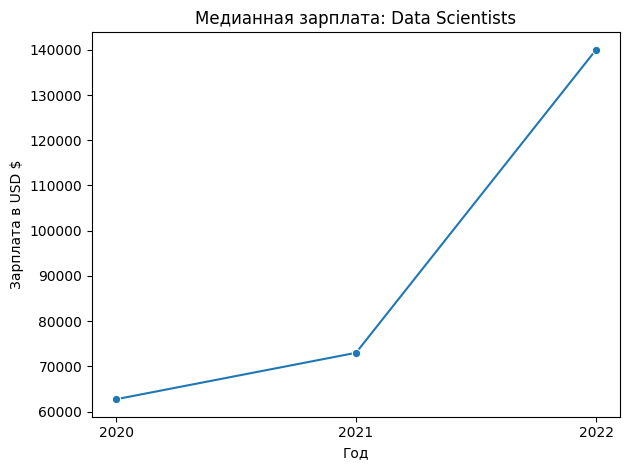

In [31]:
# –ì–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
filt_data_science = df[df['job_title'] == 'Data Scientist']
years_data_science = filt_data_science.groupby('work_year')['salary_in_usd'].median()


lineplot = sns.lineplot(y=years_data_science.values, x=years_data_science.index, marker='o')
lineplot.set_xticks([2020, 2021, 2022])
lineplot.set_title('–ú–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞: Data Scientists')
lineplot.set_xlabel('–ì–æ–¥')
lineplot.set_ylabel('–ó–∞—Ä–ø–ª–∞—Ç–∞ –≤ USD $')


fig.suptitle('–î–∏–Ω–∞–º–∏–∫–∞ –º–µ–¥–∏–∞–Ω–Ω–æ–π –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã –ø–æ –≥–æ–¥–∞–º', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

–ü—Ä–æ–≤–µ–¥—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–µ–ª–∞-–£–æ–ª–∏—Å–∞ –∏ –ø–æ—Å—Ç–æ—Ä–∏–≤ –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–¥–∏–∞–Ω–Ω–æ–π –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã –º–æ–∂–Ω–æ —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ –µ–∂–µ–≥–æ–¥–Ω–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Ä–æ—Å—Ç –¥–æ—Ö–æ–¥–æ–≤ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ data science.

## üîç2. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã: –°—É—â–µ—Å—Ç–≤—É–µ—Ç –ª–∏ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã Data Scientist –∏ Data Engineer –≤ 2022 –≥–æ–¥—É?

In [32]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
data_engineer = df[df['job_title'] == 'Data Engineer']
data_engineer_2022 = np.array(data_engineer[data_engineer['work_year'] == 2022]['salary_in_usd'])
print(data_science_2022)
print(data_engineer_2022)

[130000  90000 136620  99360 117789 104702 146000 123000  65438  39263
 165220 120160 180000 120000  95550 167000 123000 150000 211500 138600
 170000 123000 215300 158200 180000  71982  45807 260000 180000  80000
 140400 215300  31615  18442 104890 140000 220000 140000 183228  91614
 185100 200000 120000 230000 100000 100000  35590 100000 165000  52396
  40000  86703  48000 122346  69336 135000  78000 141300 102100 205300
 140400 176000 144000 205300 140400 140000 210000 140000 210000 140000
 210000 140000 230000 150000 210000 160000 130000]
[135000 170000 150000  52351 242000 200000  78526  52351  45807 181940
 132320 220110 160080 165400 132320 243900 128875  93700 156600 108800
 113000  78526  65438 160000 136000 165400 136994 101570 132320 155000
 117789 209100 154600 175000  98158 183600  65949  49461  78526  58894
  63900  82900 100800  49461  87932  76940 104702  91614  65949  87932
  98158  78526  76940 209100 154600 180000  80000 105000  54957 120000
 100000 324000 216000 2100

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

### üìä –§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≥–∏–ø–æ—Ç–µ–∑:

### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ): **–í—ã–±–æ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ):  **–í—ã–±–æ—Ä–∫–∞ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### üîç –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
–¢–µ—Å—Ç –ø—Ä–æ–≤–µ—Ä—è–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–º—É –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é

In [33]:
_, p = stats.shapiro(data_science_2022)
if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')
else:
    print(f'P-value = {p:.3f}. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')

P-value = 0.327. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è


In [34]:
_, p = stats.shapiro(data_engineer_2022)
if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')
else:
    print(f'P-value = {p:.3f}. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')

P-value = 0.010. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è


### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ)
**–û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –∑–∞—Ä–ø–ª–∞—Ç –º–µ–∂–¥—É Data Scientists –∏ Data Engineers**  
$H_0: F_{\text{DS}}(x) = F_{\text{DE}}(x)$  
*–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞—Ä–ø–ª–∞—Ç Data Scientists –∏ Data Engineers –∏–¥–µ–Ω—Ç–∏—á–Ω–æ*

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ)
**–ù–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –∑–∞—Ä–ø–ª–∞—Ç –º–µ–∂–¥—É Data Scientists –∏ Data Engineers**  
$H_1: F_{\text{DS}}(x) \neq F_{\text{DE}}(x)$  
*–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞—Ä–ø–ª–∞—Ç Data Scientists –∏ Data Engineers —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è*

---

### üéØ –¶–µ–ª—å –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
–ü—Ä–æ–≤–µ—Ä–∏—Ç—å, —Å—É—â–µ—Å—Ç–≤—É—é—Ç –ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –∑–∞—Ä–ø–ª–∞—Ç –º–µ–∂–¥—É —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞–º–∏ Data Scientist –∏ Data Engineer –≤ 2022 –≥–æ–¥—É.

---

### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ (U-–∫—Ä–∏—Ç–µ—Ä–∏–π)

**–ü—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç—å —Ç–µ—Å—Ç–∞:**
- –ù–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –≤—ã–±–æ—Ä–∫–∏
- –ü–æ—Ä—è–¥–∫–æ–≤–∞—è —à–∫–∞–ª–∞ –∏–ª–∏ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
- –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è



In [35]:
_, p = stats.mannwhitneyu(data_science_2022, data_engineer_2022)
if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∏ –∏–º–µ—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ –æ—Ç–ª–∏—á–∏—è')
else:
    print(f'P-value = {p:.3f}. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∏ –Ω–µ –∏–º–µ—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ –æ—Ç–ª–∏—á–∏—è')

P-value = 0.155. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∏ –Ω–µ –∏–º–µ—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ –æ—Ç–ª–∏—á–∏—è


–ò—Å—Ö–æ–¥—è –∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Ç–µ—Å—Ç–∞ –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –º—ã –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 0.95 –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ —É —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data science –∏ Data Engineer –æ—Ç–ª–∏—á–∞—é—Ç—Å—è.

## üîç3. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã: –ö–∞–∫ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è –∑–∞—Ä–ø–ª–∞—Ç—ã —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Scientist –≤ –∫–æ–º–ø–∞–Ω–∏—è—Ö —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤?

In [36]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
data_science_small = np.array(data_science[data_science['company_size'] == 'Small']['salary_in_usd'])
data_science_medium = np.array(data_science[data_science['company_size'] == 'Medium']['salary_in_usd'])
data_science_large = np.array(data_science[data_science['company_size'] == 'Large']['salary_in_usd'])

In [37]:
print(data_science_small)
print()
print(data_science_medium)
print()
print(data_science_large)

[ 51321  45760  76958  21669  62726  49268 105000  91237  62726  42197
   9466 100000  82500   2859   5679  12901  87738  90000  16904  25532
  48000]

[ 39916  38776 118000 138350  49646  80000 150000 119059  61467  33808
  46809   4000  28399  77684 100000 130000  90000 136620  99360 117789
 104702 146000 123000  65438  39263 165220 120160  95550 167000 123000
 150000 211500 138600 170000 123000 180000  71982  45807 260000 180000
  80000  18442 104890 140000 220000 140000 183228  91614 185100 200000
 120000 230000 100000 100000 100000 165000  86703  69336  78000 141300
 102100 176000 144000 205300 140400 140000 210000 140000 210000 140000
 210000 140000 230000 150000 210000 160000 130000]

[ 79833  35735  40481  68428 105000 120000 412000  53192  29751  73000
  50000  75774  13400  40038  90734 147000  37825 160000  90734 116914
  56256  88654 135000 103691 165000  36643 115000 130000  58000  20171
 109000 180000 120000 215300 158200 140400 215300  31615  35590  52396
  40000 122346 

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

### üìä –§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≥–∏–ø–æ—Ç–µ–∑:

### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ): **–í—ã–±–æ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ):  **–í—ã–±–æ—Ä–∫–∞ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### üîç –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
–¢–µ—Å—Ç –ø—Ä–æ–≤–µ—Ä—è–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–º—É –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é

In [38]:
_, p = stats.shapiro(data_science_small)
if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')
else:
    print(f'P-value = {p:.3f}. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')

P-value = 0.189. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è


In [39]:
_, p = stats.shapiro(data_science_medium)
if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')
else:
    print(f'P-value = {p:.3f}. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')

P-value = 0.639. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è


In [40]:
_, p = stats.shapiro(data_science_large)
if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')
else:
    print(f'P-value = {p:.3f}. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')

P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è


### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ)
**–û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö –≤ —Ä–∞–∑–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏—è—Ö**  
$H_0: \mu_0 = \mu_1 = \mu_2$

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ)
**–ù–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö –≤ —Ä–∞–∑–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏—è—Ö**  
$H_1: \mu_0 \neq \mu_1 \neq \mu_2$

–≥–¥–µ:
- $\mu_0$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –≤ –º–∞–ª–æ–π —Ñ–∏—Ä–º–µ
- $\mu_1$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –Ω–∞ —Å—Ä–µ–¥–Ω–µ–º –ø—Ä–µ–¥–ø—Ä–∏—è—Ç–∏–∏ 
- $\mu_2$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –≤ –±–æ–ª—å—à–æ–π –∫–æ–º–ø–∞–Ω–∏–∏
### üéØ –¶–µ–ª—å –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
–ü—Ä–æ–≤–µ—Ä–∏—Ç—å, —Å—É—â–µ—Å—Ç–≤—É—é—Ç –ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Scientist –≤ –º–∞–ª—ã—Ö, —Å—Ä–µ–¥–Ω–∏—Ö –∏ –∫—Ä—É–ø–Ω—ã—Ö –ø—Ä–µ–¥–ø—Ä–∏—Ç–∏—è—Ö.

### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–µ–ª–∞-–£–æ–ª–∏—Å–∞

In [41]:
_, p = stats.kruskal(data_science_small, data_science_medium, data_science_large)

if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–µ –æ—Ç–ª–∏—á–∏–µ –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏.')
else:
    print(f'P-value = {p:.3f}. –ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö –æ—Ç–ª–∏—á–∏–π –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏ –Ω–µ—Ç.')

P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–µ –æ—Ç–ª–∏—á–∏–µ –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏.


## üîç4. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã: –ï—Å—Ç—å –ª–∏ —Å–≤—è–∑—å –º–µ–∂–¥—É –Ω–∞–ª–∏—á–∏–µ–º –¥–æ–ª–∂–Ω–æ—Å—Ç–µ–π Data Scientist –∏ Data Engineer –∏ —Ä–∞–∑–º–µ—Ä–æ–º –∫–æ–º–ø–∞–Ω–∏–∏?

### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ)
**–û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É –¥–æ–ª–∂–Ω–æ—Å—Ç—å—é –∏ —Ä–∞–∑–º–µ—Ä–æ–º –∫–æ–º–ø–∞–Ω–∏–∏**  
$H_0: \text{–î–æ–ª–∂–Ω–æ—Å—Ç—å –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã}$

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ)  
**–ù–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É –¥–æ–ª–∂–Ω–æ—Å—Ç—å—é –∏ —Ä–∞–∑–º–µ—Ä–æ–º –∫–æ–º–ø–∞–Ω–∏–∏**  
$H_1: \text{–î–æ–ª–∂–Ω–æ—Å—Ç—å –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞–≤–∏—Å–∏–º—ã}$

### üéØ –¶–µ–ª—å –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
–ü—Ä–æ–≤–µ—Ä–∏—Ç—å, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –¥–æ–ª–∂–Ω–æ—Å—Ç–µ–π Data Scientist –∏ Data Engineer –∏ –∫–æ–º–ø–∞–Ω–∏—è–º–∏ —Ä–∞–∑–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞.

---

### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç (œá¬≤)

**–°—É—Ç—å —Ç–µ—Å—Ç–∞:** –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –¥–≤—É—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—É—Ç–µ–º —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –Ω–∞–±–ª—é–¥–∞–µ–º—ã—Ö —á–∞—Å—Ç–æ—Ç —Å –æ–∂–∏–¥–∞–µ–º—ã–º–∏ —á–∞—Å—Ç–æ—Ç–∞–º–∏ –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.



In [42]:
# –ì–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ
data_filtr_4 = df[(df['job_title'] == 'Data Scientist') | (df['job_title'] == 'Data Engineer')]

# –≤—ã—á–∏—Å–ª—è–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–ø—Ä—è–∂—ë–Ω–Ω–æ—Å—Ç–∏
table = pd.crosstab(data_filtr_4['job_title'], data_filtr_4['company_size'])

# –ø—Ä–æ–≤–æ–¥–∏–º —Ç–µ—Å—Ç
_, p, _, _ = stats.chi2_contingency(table)


if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –î–æ–ª–∂–Ω–æ—Å—Ç—å –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞–≤–∏—Å–∏–º—ã.')
else:
    print(f'P-value = {p:.3f}. –ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –î–æ–ª–∂–Ω–æ—Å—Ç—å –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã.')

P-value = 0.008. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –î–æ–ª–∂–Ω–æ—Å—Ç—å –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞–≤–∏—Å–∏–º—ã.


–†–µ–∑—É–ª—å—Ç–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ç–µ—Å—Ç–∞ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 0.95 —É—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –¥–æ–ª–∂–Ω–æ—Å—Ç—å –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞–≤–∏—Å–∏–º—ã, —Ç–æ –µ—Å—Ç—å —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –ø—Ä–µ–¥–ø—Ä–∏—è—Ç–∏—è—Ö. –î–∞–Ω–Ω—ã–π —Ñ–∞–∫—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ª–æ–≥–∏—á–µ–Ω, —Ç–∞–∫ –∫–∞–∫ —á–µ–º –±–æ–ª—å—à–µ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏, —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ —Ä–∞–±–æ—á–∏—Ö 

## üîç5. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã: –ö–∞–∫ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è –∑–∞—Ä–ø–ª–∞—Ç—ã —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Entry-level, Mid-level, Senior-level, Executive —É—Ä–æ–≤–Ω–µ–π?

In [60]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö 
data_entry_level = np.array(df[df['experience_level'] == 'Entry-level']['salary_in_usd'])
data_mid_level = np.array(df[df['experience_level'] == 'Mid-level']['salary_in_usd'])
data_senior_level = np.array(df[df['experience_level'] == 'Senior-level']['salary_in_usd'])
data_executive_level = np.array(df[df['experience_level'] == 'Executive']['salary_in_usd'])

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

### üìä –§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≥–∏–ø–æ—Ç–µ–∑:

### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ): **–í—ã–±–æ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ):  **–í—ã–±–æ—Ä–∫–∞ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### üîç –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
–¢–µ—Å—Ç –ø—Ä–æ–≤–µ—Ä—è–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–º—É –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é

In [44]:
experience_levels_dict = {
    'Entry-level': data_entry_level,
    'Mid-level': data_mid_level,
    'Senior-level': data_senior_level,
    'Executive': data_executive_level
}
for keys, values in experience_levels_dict.items():
    _, p = stats.shapiro(values)
    if p <= alpha:
        print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —É—Ä–æ–≤–Ω—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è {keys} –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')
    else:
        print(f'P-value = {p:.3f}. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —É—Ä–æ–≤–Ω—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è {keys} –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')

P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —É—Ä–æ–≤–Ω—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è Entry-level –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —É—Ä–æ–≤–Ω—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è Mid-level –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —É—Ä–æ–≤–Ω—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è Senior-level –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
P-value = 0.001. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —É—Ä–æ–≤–Ω—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è Executive –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è


### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ)
**–û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö –º–µ–∂–¥—É —É—Ä–æ–≤–Ω—è–º–∏ –æ–ø—ã—Ç–∞**  
$H_0: \mu_E = \mu_M = \mu_S = \mu_X$

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ)
**–ù–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö –º–µ–∂–¥—É —É—Ä–æ–≤–Ω—è–º–∏ –æ–ø—ã—Ç–∞**  
$H_1: \exists i \neq j \quad \mu_i \neq \mu_j$

–≥–¥–µ:
- $\mu_E$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ **Entry-level**
- $\mu_M$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ **Mid-level**
- $\mu_S$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ **Senior-level**
- $\mu_X$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ **Executive**

---

### üéØ –¶–µ–ª—å –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
–ü—Ä–æ–≤–µ—Ä–∏—Ç—å, —Å—É—â–µ—Å—Ç–≤—É—é—Ç –ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Science –º–µ–∂–¥—É —Ä–∞–∑–Ω—ã–º–∏ —É—Ä–æ–≤–Ω—è–º–∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ–≥–æ –æ–ø—ã—Ç–∞ (–æ—Ç –Ω–∞—á–∏–Ω–∞—é—â–∏—Ö –¥–æ —Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª–µ–π –≤—ã—Å—à–µ–≥–æ –∑–≤–µ–Ω–∞).

---

### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–µ–ª–∞-–£–æ–ª–ª–∏—Å–∞



In [45]:
_, p = stats.kruskal(data_entry_level, data_mid_level, data_senior_level, data_executive_level)

if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–µ –æ—Ç–ª–∏—á–∏–µ –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏.')
else:
    print(f'P-value = {p:.3f}. –ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö –æ—Ç–ª–∏—á–∏–π –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏ –Ω–µ—Ç.')

P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–µ –æ—Ç–ª–∏—á–∏–µ –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏.


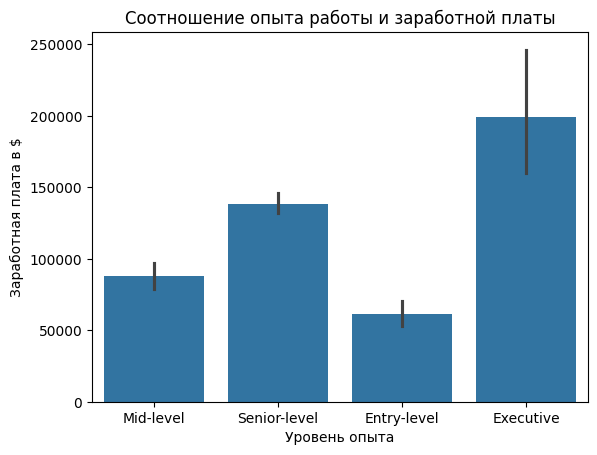

In [46]:
barplot = sns.barplot(data=df,
                      x='experience_level',
                      y='salary_in_usd')
barplot.set_xlabel('–£—Ä–æ–≤–µ–Ω—å –æ–ø—ã—Ç–∞')
barplot.set_ylabel('–ó–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –≤ $')
barplot.set_title('–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –æ–ø—ã—Ç–∞ —Ä–∞–±–æ—Ç—ã –∏ –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã');

–ê–Ω–∞–ª–∏–∑ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ç–µ—Å—Ç–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–∞—Ä–∞–±–æ—Ç–Ω—ã–µ –ø–ª–∞—Ç—ã —É —Ä–∞–±–æ—Ç–Ω–∏–∫–æ–≤ —Å —Ä–∞–∑–Ω—ã–º —É—Ä–æ–≤–Ω–µ–º –æ–ø—ã—Ç–∞ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è.

–ì—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ —Ç–∞–∫–∂–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∞–µ—Ç –¥–∞–Ω–Ω—ã–π —Ñ–∞–∫—Ç.

## üîç6. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã: –í–ª–∏—è–µ—Ç –ª–∏ –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –≥–æ–ª–æ–≤–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞ (–°–®–ê, –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è, –ì–µ—Ä–º–∞–Ω–∏—è, –ö–∞–Ω–∞–¥–∞) –Ω–∞ –∑–∞—Ä–∞–±–æ—Ç–Ω—É—é –ø–ª–∞—Ç—É —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Analyst?

In [52]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö 
data_analyst = df[df['job_title'] == 'Data Analyst']
data_analyst_usa = np.array(df[df['company_location'] == 'United States']['salary_in_usd'])
data_analyst_uk = np.array(df[df['company_location'] == 'United Kingdom']['salary_in_usd'])
data_analyst_germany = np.array(df[df['company_location'] == 'Germany']['salary_in_usd'])
data_analyst_canada = np.array(df[df['company_location'] == 'Canada']['salary_in_usd'])

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

### üìä –§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≥–∏–ø–æ—Ç–µ–∑:

### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ): **–í—ã–±–æ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ):  **–í—ã–±–æ—Ä–∫–∞ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ**

### üîç –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
–¢–µ—Å—Ç –ø—Ä–æ–≤–µ—Ä—è–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–º—É –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é

In [55]:
# –°–ª–æ–≤–∞—Ä—å —Å –∑–∞—Ä–ø–ª–∞—Ç–∞–º–∏ Data Analyst –ø–æ —Å—Ç—Ä–∞–Ω–∞–º
data_analyst_by_country = {
    'United States': data_analyst_usa,
    'United Kingdom': data_analyst_uk,
    'Germany': data_analyst_germany,
    'Canada': data_analyst_canada
}
for keys, values in data_analyst_by_country.items():
    _, p = stats.shapiro(values)
    if p <= alpha:
        print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —Å—Ç—Ä–∞–Ω—ã {keys} –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')
    else:
        print(f'P-value = {p:.3f}. –ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —Å—Ç—Ä–∞–Ω—ã {keys} –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')


P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —Å—Ç—Ä–∞–Ω—ã United States –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
P-value = 0.014. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —Å—Ç—Ä–∞–Ω—ã United Kingdom –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
P-value = 0.040. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —Å—Ç—Ä–∞–Ω—ã Germany –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –í—ã–±–æ—Ä–∫–∞ –¥–ª—è —Å—Ç—Ä–∞–Ω—ã Canada –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è


### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ)
**–û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö Data Analyst –º–µ–∂–¥—É —Å—Ç—Ä–∞–Ω–∞–º–∏**  
$H_0: \mu_{US} = \mu_{UK} = \mu_{DE} = \mu_{CA}$

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ)
**–ù–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö Data Analyst –º–µ–∂–¥—É —Å—Ç—Ä–∞–Ω–∞–º–∏**  
$H_1: \exists i \neq j \quad \mu_i \neq \mu_j$

–≥–¥–µ:
- $\mu_{US}$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ Data Analyst –≤ **–°–®–ê**
- $\mu_{UK}$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ Data Analyst –≤ **–í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏–∏**
- $\mu_{DE}$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ Data Analyst –≤ **–ì–µ—Ä–º–∞–Ω–∏–∏**
- $\mu_{CA}$ ‚Äî –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ Data Analyst –≤ **–ö–∞–Ω–∞–¥–µ**

---

### üéØ –¶–µ–ª—å –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
–ü—Ä–æ–≤–µ—Ä–∏—Ç—å, —Å—É—â–µ—Å—Ç–≤—É—é—Ç –ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–∞—Ä–ø–ª–∞—Ç–∞—Ö —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤ Data Analyst –º–µ–∂–¥—É –∫–æ–º–ø–∞–Ω–∏—è–º–∏, –≥–æ–ª–æ–≤–Ω—ã–µ –æ—Ñ–∏—Å—ã –∫–æ—Ç–æ—Ä—ã—Ö —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –≤ —Ä–∞–∑–Ω—ã—Ö —Å—Ç—Ä–∞–Ω–∞—Ö.

---

### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –ö—Ä–∞—Å–∫–µ–ª–∞-–£–æ–ª–ª–∏—Å–∞



In [56]:
_, p = stats.kruskal(data_analyst_usa, data_analyst_uk, data_analyst_germany, data_analyst_canada)

if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–µ –æ—Ç–ª–∏—á–∏–µ –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏.')
else:
    print(f'P-value = {p:.3f}. –ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö –æ—Ç–ª–∏—á–∏–π –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏ –Ω–µ—Ç.')

P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–µ –æ—Ç–ª–∏—á–∏–µ –º–µ–∂–¥—É –≤—ã–±–æ—Ä–∫–∞–º–∏.


In [57]:
data_analyst_for_graphics = data_analyst[data_analyst['company_location'].isin([
    'United States', 
    'United Kingdom', 
    'Germany', 
    'Canada'
])]

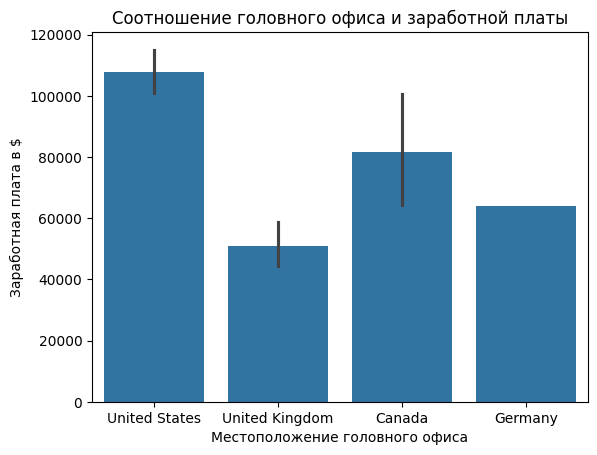

In [59]:
barplot = sns.barplot(data=data_analyst_for_graphics,
                      x='company_location',
                      y='salary_in_usd')
barplot.set_xlabel('–ú–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –≥–æ–ª–æ–≤–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞')
barplot.set_ylabel('–ó–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –≤ $')
barplot.set_title('–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –≥–æ–ª–æ–≤–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞ –∏ –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã');

–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã data analyst –∏–º–µ—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –æ—Ç–ª–∏—á–∞—é—â—É—é—Å—è –∑–∞—Ä–∞–±–æ—Ç–Ω—É—é –ø–ª–∞—Ç—É –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è –≥–æ–ª–æ–≤–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞. –¢–æ –µ—Å—Ç—å –º–æ–∂–Ω–æ —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –≥–æ–ª–æ–≤–Ω–æ–≥–æ –æ—Ñ–∏—Å–∞ –∫–æ–º–ø–∞–Ω–∏–∏ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–∞–∑–º–µ—Ä –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã.

–û–±—ä—è—Å–Ω–∏—Ç—å —ç—Ç–æ –º–æ–∂–Ω–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–æ—Å—Ç–æ, —Ä–∞–∑–≤–∏—Ç–∏–µ it-–∫–æ–º–ø–∞–Ω–∏–π –≤ —Å—Ç—Ä–∞–Ω–∞—Ö –∏–¥—ë—Ç –ø–æ-—Ä–∞–∑–Ω–æ–º—É, –ø–æ—ç—Ç–æ–º—É –∏ –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞ –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç—Å—è –ø–æ–¥ —Ç–µ–∫—É—â—É—é —Ä—ã–Ω–æ—á–Ω—É—é —Å–∏—Ç—É–∞—Ü–∏—é. –û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –≤ –°–®–ê —Ä—ã–Ω–æ–∫ it —Ä–∞–∑–≤–∏—Ç –ª—É—á—à–µ –≤—Å–µ—Ö –≤ –º–∏—Ä–µ, –≤—ã—Å–æ–∫–∞—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è –∫–æ–º–ø–∞–Ω–∏–π, –∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏—è –∑–∞ —Ç–∞–ª–∞–Ω—Ç—ã –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Ä–æ—Å—Ç—É –∑–∞—Ä–∞–±–æ—Ç–Ω—ã—Ö –ø–ª–∞—Ç.

## üîç7. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã: –ï—Å—Ç—å –ª–∏ —Å–≤—è–∑—å –º–µ–∂–¥—É –æ–ø—ã—Ç–æ–º —Ä–∞–±–æ—Ç—ã –∏ —Ä–∞–∑–º–µ—Ä–æ–º –∫–æ–º–ø–∞–Ω–∏–∏?

### –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ)
**–û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É –¥–æ–ª–∂–Ω–æ—Å—Ç—å—é –∏ —Ä–∞–∑–º–µ—Ä–æ–º –∫–æ–º–ø–∞–Ω–∏–∏**  
$H_0: \text{–û–ø—ã—Ç —Ä–∞–±–æ—Ç—ã –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞–≤–∏—Å–∏–º—ã}$

### –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ)  
**–ù–∞–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É –¥–æ–ª–∂–Ω–æ—Å—Ç—å—é –∏ —Ä–∞–∑–º–µ—Ä–æ–º –∫–æ–º–ø–∞–Ω–∏–∏**  
$H_1: \text{–û–ø—ã—Ç —Ä–∞–±–æ—Ç—ã –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã}$

### üéØ –¶–µ–ª—å –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
–ü—Ä–æ–≤–µ—Ä–∏—Ç—å, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –æ–ø—ã—Ç–∞ —Ä–∞–±–æ—Ç—ã –∏ —Ä–∞–∑–º–µ—Ä–æ–º –∫–æ–º–ø–∞–Ω–∏–∏?
---

### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç (œá¬≤)

**–°—É—Ç—å —Ç–µ—Å—Ç–∞:** –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –¥–≤—É—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—É—Ç–µ–º —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –Ω–∞–±–ª—é–¥–∞–µ–º—ã—Ö —á–∞—Å—Ç–æ—Ç —Å –æ–∂–∏–¥–∞–µ–º—ã–º–∏ —á–∞—Å—Ç–æ—Ç–∞–º–∏ –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.

In [70]:
# –≤—ã—á–∏—Å–ª—è–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–ø—Ä—è–∂—ë–Ω–Ω–æ—Å—Ç–∏
table = pd.crosstab(df['experience_level'], df['company_size'])
table


company_size      Large  Medium  Small
experience_level                      
Entry-level          29      30     29
Executive            11      12      3
Mid-level            86      98     29
Senior-level         72     186     22

In [72]:
# –ø—Ä–æ–≤–æ–¥–∏–º —Ç–µ—Å—Ç
_, p, _, _ = stats.chi2_contingency(table)


if p <= alpha:
    print(f'P-value = {p:.3f}. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –û–ø—ã—Ç —Ä–∞–±–æ—Ç—ã –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞–≤–∏—Å–∏–º—ã.')
else:
    print(f'P-value = {p:.3f}. –ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –û–ø—ã—Ç —Ä–∞–±–æ—Ç—ã –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã.')

P-value = 0.000. –û—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –û–ø—ã—Ç —Ä–∞–±–æ—Ç—ã –∏ —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞–≤–∏—Å–∏–º—ã.
